<a href="https://colab.research.google.com/github/Nikhild1093/Nikhild1093/blob/main/Neural%20Networks/Kaggle_CIFAR_10_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c cifar-10

 96% 684M/715M [00:06<00:00, 59.5MB/s]
100% 715M/715M [00:06<00:00, 108MB/s] 


In [6]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extraction Complete.')

Extraction Complete.


In [7]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [8]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 429.9/429.9 kB 24.8 MB/s eta 0:00:00


In [9]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close

<bound method SevenZipFile.close of <py7zr.py7zr.SevenZipFile object at 0x7831ea778230>>

In [10]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
path, dirs, filenames = next(os.walk('/content/train'))

In [13]:
path

'/content/train'

In [14]:
len(filenames)

50000

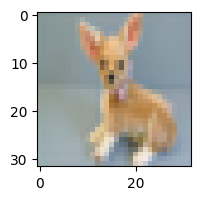

In [15]:
img = mpimg.imread(os.path.join(path,filenames[110]))
plt.figure(figsize=(2,2))
plt.imshow(img)

Labels Processing

In [16]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [17]:
labels_df.shape

(50000, 2)

In [18]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [19]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [20]:
LE = LabelEncoder()
labels_df['label'] = LE.fit_transform(labels_df['label'])

# Display the mapping of labels to numerical values
print("Original labels to encoded values mapping:")
for i, label in enumerate(LE.classes_):
    print(f"{label}: {i}")

Original labels to encoded values mapping:
airplane: 0
automobile: 1
bird: 2
cat: 3
deer: 4
dog: 5
frog: 6
horse: 7
ship: 8
truck: 9


In [21]:
LE.classes_

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype=object)

Image Processing

In [22]:
#Converting images to numpy array

data=[]

for id in labels_df['id']:
  img = mpimg.imread(os.path.join(path,f'{id}.png'))
  img = np.array(img)
  data.append(img)

In [23]:
data[0].shape

(32, 32, 3)

In [24]:
# Convert images list & labels list to numpy array
X = np.array(data)
Y = np.array(labels_df['label'])

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=2)

In [26]:
# Data Scaling
xtrain_sc = xtrain/255
xtest_sc = xtest/255

Building Neural Network

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
classes=10

#Setting up the layers of the NN

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(classes,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
#Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])

In [30]:
#Training the NN
model.fit(xtrain_sc,ytrain,validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.1793 - loss: 2.2237 - val_acc: 0.2777 - val_loss: 2.0070
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.2931 - loss: 1.9868 - val_acc: 0.2990 - val_loss: 1.9267
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3078 - loss: 1.9291 - val_acc: 0.3285 - val_loss: 1.8937
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3260 - loss: 1.8970 - val_acc: 0.3345 - val_loss: 1.8670
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3351 - loss: 1.8757 - val_acc: 0.3397 - val_loss: 1.8508
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3418 - loss: 1.8527 - val_acc: 0.3495 - val_loss: 1.8289
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.3535 - loss: 1.8339 - val_acc: 0.3590 - val_loss: 1.8145
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3609 - loss: 1.8089 - val_acc: 0.3605 - val_loss: 1.7988
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

ResNet50

In [31]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [32]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [34]:
model = keras.models.Sequential()
model.add(keras.layers.UpSampling2D((2,2)))
model.add(keras.layers.UpSampling2D((2,2)))
model.add(keras.layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(classes, activation='softmax'))

In [36]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [41]:
history = model.fit(xtrain_sc,ytrain, validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 346ms/step - acc: 0.4762 - loss: 3.0399 - val_acc: 0.7667 - val_loss: 1.3937
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - acc: 0.5296 - loss: 2.6532 - val_acc: 0.7872 - val_loss: 1.3673
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - acc: 0.5592 - loss: 2.3932 - val_acc: 0.7812 - val_loss: 1.4802
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 345ms/step - acc: 0.6045 - loss: 2.1173 - val_acc: 0.8055 - val_loss: 1.3663
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - acc: 0.6276 - loss: 1.9977 - val_acc: 0.8353 - val_loss: 0.9069
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - acc: 0.6594 - loss: 1.8290 - val_acc: 0.8422 - val_loss: 0.8083
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - acc: 0.6772 - loss: 1.7952 - val_acc: 0.8518 - val_loss: 0.8061
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 345ms/step - acc: 0.6893 - loss: 1.7172 - val_acc: 0.8685 - val_loss: 0.7803
Epoch 9/

In [42]:
loss, accuracy = model.evaluate(xtest_sc,ytest)
print('Test Accuracy = ',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - acc: 0.8736 - loss: 0.8105
Test Accuracy =  0.8715000152587891


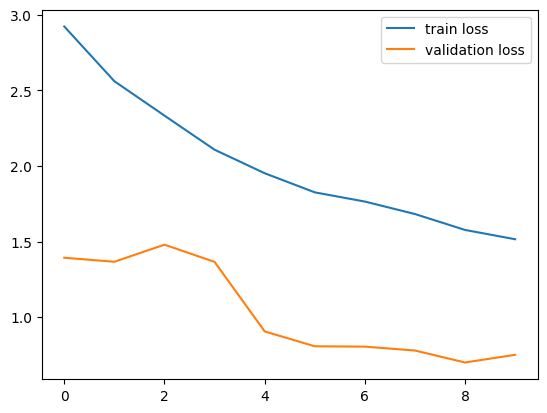

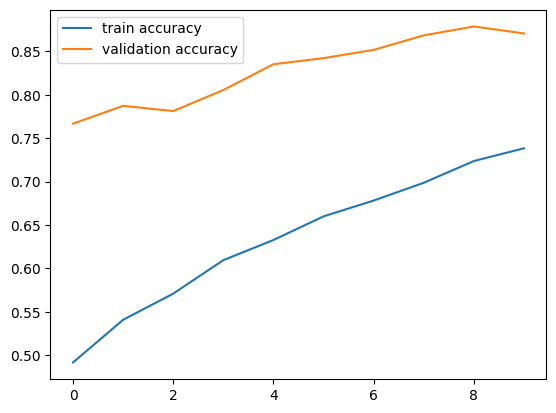

In [43]:
h= history

#Plot Loss value
plt.plot(h.history['loss'],label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

#Plot Accuracy Value
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()
